In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
import torchvision
import torchvision.transforms as transforms

from PIL import Image

data_path = "images/train/"

products = pd.read_csv("products.csv")

# label list
classes = np.unique(products['GS1 Form'])

# Define relevant variables for the ML task
batch_size = 32
num_classes = len(classes)
learning_rate = 0.001
num_epochs = 20

# normalizing data ...
transform = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])

# Device will determine whether to run the training on GPU or CPU.
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [50]:
"""Loading data with PyTorch"""

# loading data
train_data = torchvision.datasets.ImageFolder(root=data_path, 
                                              transform=transform)

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = batch_size,
                                           shuffle = True)

In [51]:
# """Functions to show an image"""

# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()

# # get some random training images
# data_iter = iter(train_loader)
# images, labels = next(data_iter)

# # show images
# imshow(torchvision.utils.make_grid(images))

# # print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [7]:
"""Convolutional Neural Network"""

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [8]:
"""This is our Loss function (and optimizer)"""
"""Classification Cross-Entropy loss and SGD with momentum"""

"""Lets use this for now, but later change it to something different"""

import torch.optim as optim

model = Net(num_classes)

# if torch.cuda.is_available():
#     model.cuda()

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

NameError: name 'train_loader' is not defined

In [54]:
"""Neural network training"""

# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        # images = images.to(device)
        # labels = labels.to(device)
        
        images = images.to()
        labels = labels.to()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/20], Loss: 2.5771
Epoch [2/20], Loss: 2.6020
Epoch [3/20], Loss: 2.4244
Epoch [4/20], Loss: 1.9739
Epoch [5/20], Loss: 2.5688
Epoch [6/20], Loss: 1.7747
Epoch [7/20], Loss: 0.9567
Epoch [8/20], Loss: 0.9566
Epoch [9/20], Loss: 0.6437
Epoch [10/20], Loss: 1.8674
Epoch [11/20], Loss: 2.5631
Epoch [12/20], Loss: 2.4833
Epoch [13/20], Loss: 1.1076
Epoch [14/20], Loss: 1.7388
Epoch [15/20], Loss: 1.1920
Epoch [16/20], Loss: 2.2894
Epoch [17/20], Loss: 2.8132
Epoch [18/20], Loss: 0.9556
Epoch [19/20], Loss: 1.3166
Epoch [20/20], Loss: 2.1169


In [55]:
# saving model
torch.save(model.state_dict(), "models/model_batch_x.pth")
print("Saved current model.")

Saved current model.


In [11]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        # images = images.to(device)
        # labels = labels.to(device)
        
        images = images.to()
        labels = labels.to()
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(len(products), 100 * correct / total))

NameError: name 'train_loader' is not defined

In [9]:
# loading model
model = Net(num_classes)
model.load_state_dict(torch.load("models/model_batch128.pth"))

<All keys matched successfully>

tray 



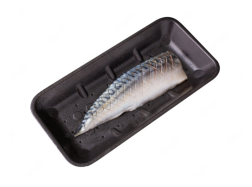

In [17]:
# prediction testing

img_path = 'images/test/a.webp'

img = Image.open(img_path)
img = transform(img)
img = img.view(1, 3, 32, 32)

output = model(img)

prediction = int(torch.max(output.data, 1)[1].numpy())

print(classes[prediction], '\n')

plt.figure(figsize=(3,3))
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()